# Introduction To Statisitcal Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Gaussian Mixture Model (GMM)
GMM is a probabilistic model for representing normally distrobuted subpopulation in a population.

### Activity: Fit GMM to a given data sample
- Task One: Generate random numbers
- Task Two: Plot hisogram of x3 and obtain the weights

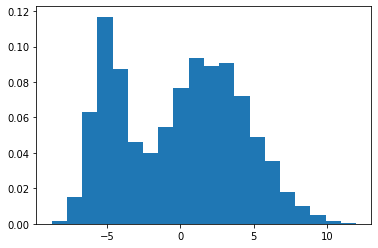

In [2]:
from sklearn import mixture

x_1 = np.random.normal(-5, 1, 3000)
x_2 = np.random.normal(2, 3, 7000)
x = np.concatenate((x_1, x_2))
plt.hist(x, bins=20, density=1)
plt.show()

In [3]:
gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(x.reshape(-1,1))
print('___Means___')
print(gmm.means_)

print('___Covariances___')
print(gmm.covariances_)

print('___Weights___')
print(gmm.weights_)

___Means___
[[-4.92404426]
 [ 2.1321643 ]]
___Covariances___
[[[1.21241918]]

 [[8.0500961 ]]]
___Weights___
[0.31652067 0.68347933]


### GMM has now learned about the probability density function of the data
- By taking a sample and polting it from gmm we see that we get the same distrbution as bef

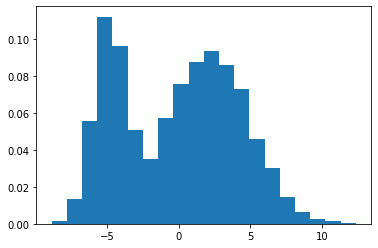

In [4]:
z = gmm.sample(10000)
plt.hist(z[0], bins=20, density=1)
plt.show()

## Kernal Density Estimation (KDE)

Kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. In other words the aim of KDE is to find probability density function (PDF) for a given dataset. Approximate the pdf of dataset: $p(x) = \frac{1}{Nh}\sum_{i = 1}^{N} \ K(\frac{x - x_i}{h})$ where $h$ is a bandwidth and $N$ is the number of data points

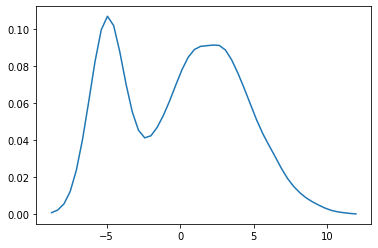

In [5]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=0.6)
kde.fit(x.reshape(-1,1))

s = np.linspace(np.min(x), np.max(x))
log_pdf = kde.score_samples(s.reshape(-1,1))
plt.plot(s, np.exp(log_pdf))

### KDE has now learned about the probability density function of the data
- By taking a sample and polting it from gmm we see that we get the same distrbution as bef

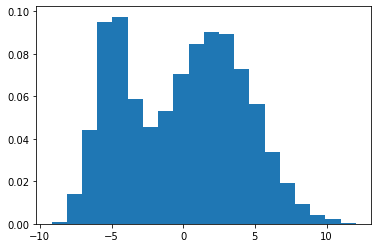

In [6]:
m = kde.sample(10000)
plt.hist(m, bins=20, density=1)
plt.show()

## Why do we want to be able to get the pdf of a dataset and generate new data?
It allows us the fill in missing data in our dataset in order to clean the data and possible get better results

## Correlation
Used to represent the relationship between two sets of data. An Example of this would be if you wanted to see how the amount of calories you eat to how much weight you gain or how the time you study relates to your test grade.

In [39]:
import pandas as pd
import seaborn as sns
import scipy.stats

### Activity: Write a function that calculates a Pearsons Correlation

In [22]:
def pearson_corr(X, Y):
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    num = sum((x - X_mean)*(y - Y_mean) for x, y in zip(X,Y))
    sqrt_1 = np.sqrt(sum((x - X_mean)**2 for x in X))
    sqrt_2 = np.sqrt(sum((y - Y_mean)**2 for y in Y))
    return num / (sqrt_1*sqrt_2)
print(pearson_corr(df['SepalLengthCm'], df['PetalLengthCm']))
print(scipy.stats.pearsonr(df['SepalLengthCm'], df['PetalLengthCm']))

0.8717541573048717
(0.8717541573048713, 1.0384540627941062e-47)


### Activity: Calculates all the correlations for isis dataset

In [44]:
def corr(dataFrame, exclude=None):
    if exclude is not None:
        dataFrame = dataFrame.drop(columns=exclude)
    columns = dataFrame.columns
    corrs = []
    for index in range(len(columns)):
        column_1 = dataFrame[columns[index]]
        column_2 = dataFrame[columns[len(columns)-index-1]]
        corrs.append(pearson_corr(column_1, column_2))
    return corrs
                     
print(corr(df, exclude=['Id', 'Species']))

[0.8179536333691636, -0.4205160964011544, -0.4205160964011544, 0.8179536333691636]


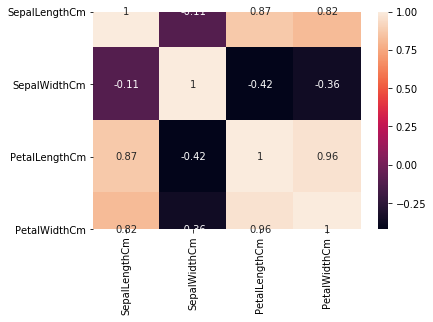

In [48]:
df = pd.read_csv('../Data/Iris.csv')
data = df.drop(columns=['Id', 'Species'])
sns.heatmap(data.corr(), annot=True)

# What's the differece from crosstab and corrilation?
Crosstab can't have negative values but corrilation does. So, we use crosstab for categorical data and corrilation for numerical data.

# What if we want to compare categorical and numerical  data?
we transform the numerical data into categorical data by making sets of ranges from the numerical data